# 🔬 Advanced Research Analysis & ML Prediction System

## COMPLETE SELF-CONTAINED ADVANCED LIPID ANALYSIS PIPELINE
# =========================================================


In [2]:
#!pip install openpyxl


In [3]:
# COMPLETE SELF-CONTAINED ADVANCED LIPID ANALYSIS PIPELINE
# =========================================================

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, AllChem, PandasTools
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# BASE PIPELINE CLASS
class EnhancedLipidPipeline:
    """Complete enhanced lipid analysis pipeline with all four improvements"""
    
    def __init__(self, sdf_path):
        self.sdf_path = sdf_path
        self.df = None
        self.search_engine = None
        
    def run_complete_analysis(self, sample_size=None):
        """Run the complete enhanced analysis pipeline"""
        print("🚀 STARTING ENHANCED LIPID MAPS ANALYSIS")
        print("=" * 50)
        
        # 1. Load and preprocess data
        if not self._load_data(sample_size):
            return False
            
        # 2. Apply all enhancements
        self._apply_official_classification()
        self._validate_exact_mass()
        self._add_external_links()
        
        print("✅ ENHANCED PIPELINE READY!")
        self._print_summary()
        return True
    
    def _load_data(self, sample_size):
        """Load SDF data with error handling"""
        try:
            self.df = PandasTools.LoadSDF(self.sdf_path, 
                                        molColName='Molecule',
                                        smilesName='SMILES',
                                        strictParsing=False)
            
            if sample_size and sample_size < len(self.df):
                self.df = self.df.sample(sample_size, random_state=42)
                
            print(f"📥 Loaded {len(self.df)} lipid structures")
            
            # Calculate basic properties
            self._calculate_molecular_properties()
            return True
            
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return False
    
    def _calculate_molecular_properties(self):
        """Calculate basic molecular properties"""
        properties = {
            'Molecular_Weight': Descriptors.MolWt,
            'LogP': Descriptors.MolLogP,
            'TPSA': Descriptors.TPSA,
            'HBD': Descriptors.NumHDonors,
            'HBA': Descriptors.NumHAcceptors
        }
        
        for prop_name, prop_func in properties.items():
            self.df[prop_name] = self.df['Molecule'].apply(
                lambda x: prop_func(x) if x else None
            )
    
    def _apply_official_classification(self):
        """Apply official LIPID MAPS classification"""
        print("🏷️ Applying official classification...")
        
        # Look for LM_ID column
        if 'LM_ID' in self.df.columns:
            self.df['parsed_lm_id'] = self.df['LM_ID'].apply(self._parse_lm_id)
            
            # Extract classification components
            self.df['category_code'] = self.df['parsed_lm_id'].apply(
                lambda x: x.get('category_code') if x else None
            )
            self.df['class_code'] = self.df['parsed_lm_id'].apply(
                lambda x: x.get('class_code') if x else None
            )
            
            print(f"   Parsed {self.df['category_code'].notna().sum()} LM_IDs")
    
    def _parse_lm_id(self, lm_id):
        """Parse LIPID MAPS ID"""
        if not lm_id or not isinstance(lm_id, str) or not lm_id.startswith('LM'):
            return None
            
        try:
            return {
                'category_code': lm_id[2:4],
                'class_code': lm_id[4:6],
                'subclass_code': lm_id[6:8]
            }
        except:
            return None
    
    def _validate_exact_mass(self):
        """Validate exact mass accuracy"""
        if 'EXACT_MASS' not in self.df.columns:
            print("⚠️  No EXACT_MASS column found for validation")
            return
            
        print("⚖️ Validating exact masses...")
        
        validations = []
        for idx, row in self.df.iterrows():
            valid = self._validate_single_mass(row)
            validations.append(valid)
        
        validation_df = pd.DataFrame(validations)
        self.df['mass_valid'] = validation_df['valid']
        self.df['mass_discrepancy'] = validation_df['discrepancy']
        
        valid_count = validation_df['valid'].sum()
        print(f"   Mass validation: {valid_count}/{len(validation_df)} valid")
    
    def _validate_single_mass(self, row):
        """Validate mass for a single lipid"""
        try:
            reported = float(row['EXACT_MASS'])
            calculated = Descriptors.ExactMolWt(row['Molecule']) if row['Molecule'] else None
            
            if calculated is None:
                return {'valid': False, 'discrepancy': None}
                
            discrepancy = abs(reported - calculated)
            valid = discrepancy <= 0.01  # 0.01 Da tolerance
            
            return {'valid': valid, 'discrepancy': discrepancy}
            
        except:
            return {'valid': False, 'discrepancy': None}
    
    def _add_external_links(self):
        """Add external database links"""
        print("🔗 Adding external database links...")
        
        databases = {
            'PUBCHEM_CID': 'https://pubchem.ncbi.nlm.nih.gov/compound/{}',
            'HMDB_ID': 'https://hmdb.ca/metabolites/{}',
            'KEGG_ID': 'https://www.genome.jp/dbget-bin/www_bget?{}',
            'CHEBI_ID': 'https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:{}'
        }
        
        for db_id, url_template in databases.items():
            if db_id in self.df.columns:
                link_col = f'{db_id}_LINK'
                self.df[link_col] = self.df[db_id].apply(
                    lambda x: url_template.format(x) if pd.notna(x) else None
                )
                
                available = self.df[link_col].notna().sum()
                print(f"   {db_id}: {available} links")
    
    def _print_summary(self):
        """Print pipeline summary"""
        print("\n📊 PIPELINE SUMMARY:")
        print(f"   Total lipids: {len(self.df):,}")
        
        if 'category_code' in self.df.columns:
            categories = self.df['category_code'].value_counts()
            print(f"   Lipid categories: {len(categories)}")
            
        if 'mass_valid' in self.df.columns:
            valid_pct = self.df['mass_valid'].mean() * 100
            print(f"   Valid masses: {valid_pct:.1f}%")
        
        link_cols = [col for col in self.df.columns if col.endswith('_LINK')]
        total_links = sum(self.df[col].notna().sum() for col in link_cols)
        print(f"   External links: {total_links}")

# RESEARCH ANALYZER CLASS
class LipidResearchAnalyzer:
    """Advanced research analysis for lipidomics data"""
    
    def __init__(self, lipid_pipeline):
        self.pipeline = lipid_pipeline
        self.df = lipid_pipeline.df
        self.analysis_results = {}
        
    def comprehensive_lipid_analysis(self):
        """Run comprehensive research-focused lipid analysis"""
        print("🔬 STARTING COMPREHENSIVE LIPID RESEARCH ANALYSIS")
        print("=" * 50)
        
        analyses = [
            self._analyze_lipid_class_distribution,
            self._analyze_chemical_space,
            self._analyze_property_correlations,
            self._analyze_lipid_class_characteristics,
            self._analyze_biosynthetic_families
        ]
        
        for analysis in analyses:
            try:
                analysis()
            except Exception as e:
                print(f"⚠️  Analysis {analysis.__name__} failed: {e}")
        
        self._generate_research_report()
        
    def _analyze_lipid_class_distribution(self):
        """Detailed analysis of lipid class distribution"""
        print("📊 Analyzing lipid class distribution...")
        
        if 'CATEGORY' in self.df.columns:
            # Main category distribution
            category_dist = self.df['CATEGORY'].value_counts()
            self.analysis_results['category_distribution'] = category_dist
            
            # Molecular property distribution by category
            category_stats = self.df.groupby('CATEGORY').agg({
                'Molecular_Weight': ['mean', 'std', 'min', 'max'],
                'LogP': ['mean', 'std', 'min', 'max'],
                'TPSA': ['mean', 'std']
            }).round(2)
            
            self.analysis_results['category_property_stats'] = category_stats
            
            print(f"   Found {len(category_dist)} lipid categories")
            for category, count in category_dist.head(10).items():
                print(f"   {category}: {count} lipids")
    
    def _analyze_chemical_space(self):
        """Analyze lipid chemical space using PCA"""
        print("🧪 Analyzing chemical space with PCA...")
        
        # Select numeric properties for PCA
        numeric_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
        available_numeric = [col for col in numeric_cols if col in self.df.columns]
        
        if len(available_numeric) >= 2:
            X = self.df[available_numeric].dropna()
            
            if len(X) > 10:  # Enough data for PCA
                # Standardize features
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X)
                
                # Perform PCA
                pca = PCA(n_components=2)
                X_pca = pca.fit_transform(X_scaled)
                
                self.analysis_results['pca'] = {
                    'components': X_pca,
                    'explained_variance': pca.explained_variance_ratio_,
                    'features': available_numeric
                }
                
                print(f"   PCA explained variance: {pca.explained_variance_ratio_.sum():.2%}")
    
    def _analyze_property_correlations(self):
        """Analyze correlations between molecular properties"""
        print("📈 Analyzing property correlations...")
        
        numeric_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
        available_numeric = [col for col in numeric_cols if col in self.df.columns]
        
        if len(available_numeric) >= 2:
            correlation_matrix = self.df[available_numeric].corr()
            self.analysis_results['correlation_matrix'] = correlation_matrix
            
            # Find strong correlations (absolute value > 0.5)
            strong_correlations = []
            for i in range(len(available_numeric)):
                for j in range(i+1, len(available_numeric)):
                    corr = correlation_matrix.iloc[i, j]
                    if abs(corr) > 0.5:
                        strong_correlations.append({
                            'property1': available_numeric[i],
                            'property2': available_numeric[j],
                            'correlation': corr
                        })
            
            self.analysis_results['strong_correlations'] = strong_correlations
            
            if strong_correlations:
                print("   Strong correlations found:")
                for corr in strong_correlations[:5]:
                    print(f"   {corr['property1']} ↔ {corr['property2']}: {corr['correlation']:.3f}")
    
    def _analyze_lipid_class_characteristics(self):
        """Identify characteristic properties of each lipid class"""
        print("🎯 Analyzing lipid class characteristics...")
        
        if 'CATEGORY' in self.df.columns:
            characteristics = {}
            property_cols = ['Molecular_Weight', 'LogP', 'TPSA']
            available_props = [col for col in property_cols if col in self.df.columns]
            
            for category in self.df['CATEGORY'].unique():
                category_data = self.df[self.df['CATEGORY'] == category]
                
                char_data = {}
                for prop in available_props:
                    if prop in category_data.columns:
                        char_data[prop] = {
                            'mean': category_data[prop].mean(),
                            'std': category_data[prop].std(),
                            'range': (category_data[prop].min(), category_data[prop].max())
                        }
                
                # Identify most common properties
                if len(category_data) > 0:
                    characteristics[category] = char_data
            
            self.analysis_results['class_characteristics'] = characteristics
            
            print(f"   Analyzed characteristics for {len(characteristics)} lipid classes")
    
    def _analyze_biosynthetic_families(self):
        """Group lipids into biosynthetic families"""
        print("🧬 Analyzing biosynthetic families...")
        
        # Define biosynthetic relationships (simplified)
        biosynthetic_families = {
            'glycerolipid_family': ['GL', 'GP'],
            'sphingolipid_family': ['SP'],
            'sterol_family': ['ST'],
            'fatty_acid_family': ['FA'],
            'polyketide_family': ['PK']
        }
        
        if 'category_code' in self.df.columns:
            family_counts = {}
            for family, categories in biosynthetic_families.items():
                family_lipids = self.df[self.df['category_code'].isin(categories)]
                family_counts[family] = len(family_lipids)
            
            self.analysis_results['biosynthetic_families'] = family_counts
            
            print("   Biosynthetic family counts:")
            for family, count in family_counts.items():
                if count > 0:
                    print(f"   {family}: {count} lipids")
    
    def _generate_research_report(self):
        """Generate comprehensive research report"""
        print("\n📋 GENERATING RESEARCH ANALYSIS REPORT")
        print("=" * 40)
        
        report = {
            'total_lipids_analyzed': len(self.df),
            'lipid_categories': self.df['CATEGORY'].nunique() if 'CATEGORY' in self.df.columns else 0,
            'analysis_timestamp': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        
        # Add key findings
        if 'category_distribution' in self.analysis_results:
            top_category = self.analysis_results['category_distribution'].index[0]
            top_count = self.analysis_results['category_distribution'].iloc[0]
            report['most_abundant_category'] = f"{top_category} ({top_count} lipids)"
        
        if 'strong_correlations' in self.analysis_results:
            report['strong_correlations_found'] = len(self.analysis_results['strong_correlations'])
        
        if 'biosynthetic_families' in self.analysis_results:
            report['biosynthetic_families_analyzed'] = len(self.analysis_results['biosynthetic_families'])
        
        self.analysis_results['research_report'] = report
        
        # Print summary
        for key, value in report.items():
            print(f"   {key.replace('_', ' ').title()}: {value}")

# MACHINE LEARNING CLASS
class LipidMachineLearning:
    """Fixed machine learning for lipid classification"""
    
    def __init__(self, lipid_pipeline):
        self.pipeline = lipid_pipeline
        self.df = lipid_pipeline.df
        self.models = {}
        
    def prepare_ml_features(self, feature_type='descriptors'):
        """Prepare features for machine learning with support for multiple feature types.
    
        Args:
            feature_type (str): Type of features to generate. 
                                Options: 'descriptors', 'fingerprints', 'properties'
        """
        print("🛠️ Preparing ML features...")
    
        features = []
        feature_names = []
    
        if feature_type == 'descriptors':
            # Calculate a comprehensive set of molecular descriptors
            for mol in self.df['Molecule']:
                if mol:
                    # Calculate a broad set of descriptors
                    descs = []
                    names = []
                    # Heavy atom count
                    descs.append(mol.GetNumHeavyAtoms())
                    names.append('HeavyAtomCount')
                    # Hydrogen bond acceptors and donors
                    descs.append(Descriptors.NumHAcceptors(mol))
                    names.append('NumHAcceptors')
                    descs.append(Descriptors.NumHDonors(mol))
                    names.append('NumHDonors')
                    # Rotatable bonds
                    descs.append(Descriptors.NumRotatableBonds(mol))
                    names.append('NumRotatableBonds')
                    # Number of rings
                    descs.append(Descriptors.RingCount(mol))
                    names.append('RingCount')
                    # Additional useful descriptors
                    descs.append(Descriptors.MolLogP(mol))  # Although this is predicted, it can be a useful feature
                    names.append('RDKit_LogP')
                    descs.append(Descriptors.TPSA(mol))
                    names.append('TPSA')
                    descs.append(Descriptors.MolWt(mol))
                    names.append('MolWt')
                
                    features.append(descs)
                    if not feature_names:  # Set names only once
                        feature_names = names
                else:
                    # If molecule is invalid, append a list of NaNs
                    features.append([np.nan] * 8)  # Adjust based on number of descriptors
        
            print(f"   Prepared {len(feature_names)} molecular descriptors")
        
        elif feature_type == 'fingerprints':
            # Use Morgan fingerprints (ECFP-like)
            for mol in self.df['Molecule']:
                if mol:
                    # Generate Morgan fingerprint with radius 2 (equivalent to ECFP4)
                    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
                    features.append(list(fp))
                else:
                    features.append([0] * 1024)
        
            feature_names = [f'FP_{i}' for i in range(1024)]
            print(f"   Prepared {len(feature_names)} fingerprint bits")
        
        elif feature_type == 'properties':
            # Your original properties method for backward compatibility
            property_cols = ['Molecular_Weight', 'LogP', 'TPSA', 'HBD', 'HBA']
            available_props = [col for col in property_cols if col in self.df.columns]        
            features = self.df[available_props].values
            feature_names = available_props
            print(f"   Prepared {len(feature_names)} basic properties")
    
        else:
            print(f"❌ Unsupported feature type: {feature_type}")
            return pd.DataFrame(), []
    
        # Create feature DataFrame with the SAME index as the original dataframe
        feature_df = pd.DataFrame(features, columns=feature_names, index=self.df.index)
    
        # Remove columns with too many missing values
        feature_df = feature_df.dropna(axis=1, how='all')
    
        # Fill remaining missing values with column median
        for col in feature_df.columns:
            if feature_df[col].isna().any():
                feature_df[col] = feature_df[col].fillna(feature_df[col].median())
    
        print(f"✅ Final feature matrix: {feature_df.shape[0]} samples, {feature_df.shape[1]} features")
        return feature_df, feature_names

    
    def train_lipid_classifier(self, target_column='CATEGORY', feature_type='properties'):
        """Train classifier to predict lipid category"""
        print(f"🎯 Training lipid classifier for {target_column}...")
        
        if target_column not in self.df.columns:
            print(f"❌ Target column {target_column} not found")
            return None
        
        try:
            # Prepare features and target
            X, feature_names = self.prepare_ml_features(feature_type)
            y = self.df[target_column]
            
            # Find samples where both features and target are available
            valid_mask = y.notna() & X.notna().all(axis=1)
            
            if valid_mask.sum() == 0:
                print("❌ No valid samples for training")
                return None
            
            # Filter using the boolean mask (now indices are aligned)
            X_filtered = X[valid_mask]
            y_filtered = y[valid_mask]
            
            print(f"   Using {len(X_filtered)} samples for training")
            
            # Encode target labels
            le = LabelEncoder()
            y_encoded = le.fit_transform(y_filtered)
            
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
            )
            
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Train Random Forest classifier
            rf_classifier = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                random_state=42
            )
            
            rf_classifier.fit(X_train_scaled, y_train)
            
            # Evaluate model
            y_pred = rf_classifier.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Feature importance
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': rf_classifier.feature_importances_
            }).sort_values('importance', ascending=False)
            
            # Store model
            model_key = f"classifier_{target_column}_{feature_type}"
            self.models[model_key] = {
                'model': rf_classifier,
                'scaler': scaler,
                'label_encoder': le,
                'feature_names': feature_names,
                'accuracy': accuracy,
                'feature_importance': importance_df
            }
            
            print(f"✅ Classifier trained with {accuracy:.3f} accuracy")
            print(f"   Top 3 important features:")
            for _, row in importance_df.head(3).iterrows():
                print(f"     {row['feature']}: {row['importance']:.4f}")
            
            return self.models[model_key]
            
        except Exception as e:
            print(f"❌ Error training classifier: {e}")
            return None

    def train_property_predictor(self, target_property='LogP', feature_type='descriptors'):
        """Train regressor to predict molecular properties with robust indexing"""
        print(f"📊 Training predictor for {target_property}...")
    
        if target_property not in self.df.columns:
            print(f"❌ Target property {target_property} not found")
            return None
    
        try:
            # Prepare features and target
            X, feature_names = self.prepare_ml_features(feature_type)
            y = self.df[target_property]
        
            # Create valid indices mask
            valid_indices = y.notna() & X.notna().all(axis=1)
        
            if valid_indices.sum() == 0:
                print("❌ No valid samples for training")
                return None
        
            X_filtered = X.loc[valid_indices]
            y_filtered = y.loc[valid_indices]
        
            print(f"   Using {len(X_filtered)} samples for training")
        
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
            X_filtered, y_filtered, test_size=0.2, random_state=42
            )
        
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        
            # Train Random Forest regressor
            rf_regressor = RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                random_state=42
            )
        
            rf_regressor.fit(X_train_scaled, y_train)
        
            # Evaluate model
            y_pred = rf_regressor.predict(X_test_scaled)
            r2_score = rf_regressor.score(X_test_scaled, y_test)
        
            # Feature importance
            importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': rf_regressor.feature_importances_
            }).sort_values('importance', ascending=False)
        
            # Store model and results
            model_key = f"regressor_{target_property}_{feature_type}"
            self.models[model_key] = {
                'model': rf_regressor,
                'scaler': scaler,
                'feature_names': feature_names,
                'r2_score': r2_score,
                'feature_importance': importance_df
            }
        
            print(f"✅ Regressor trained with R² = {r2_score:.3f}")
            print(f"   Top 3 important features:")
            for _, row in importance_df.head(3).iterrows():
                print(f"     {row['feature']}: {row['importance']:.4f}")
        
            return self.models[model_key]
        
        except Exception as e:
            print(f"❌ Error training regressor: {e}")
            import traceback
            traceback.print_exc()
            return None


    def visualize_ml_results(self):
        """Visualize machine learning results - FIXED VERSION"""
        if not self.models:
            print("❌ No trained models to visualize")
            return

        for model_key, model_info in self.models.items():
            print(f"\n📊 Model: {model_key}")

           # Check the model type and use the correct metric key
           # Use .get() method to avoid KeyError, providing a default value if the key is missing :cite[4]:cite[8]
            accuracy = model_info.get('accuracy')
            r2_score = model_info.get('r2_score')

            if accuracy is not None:
                print(f"   Accuracy: {accuracy:.3f}")
            elif r2_score is not None:
                print(f"   R² Score: {r2_score:.3f}")
            else:
                print(f"   Performance metric: Not available")

            # Plot feature importance
            top_features = model_info['feature_importance'].head(10)

            plt.figure(figsize=(10, 6))
            plt.barh(range(len(top_features)), top_features['importance'])
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Feature Importance')
            plt.title(f'Feature Importance - {model_key}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()


# ADVANCED PIPELINE CLASS (NOW WITH PROPER INHERITANCE)
class AdvancedLipidPipeline(EnhancedLipidPipeline):
    """Advanced pipeline with research analysis and machine learning"""
    
    def __init__(self, sdf_path):
        super().__init__(sdf_path)
        self.research_analyzer = None
        self.ml_predictor = None
        
    def run_advanced_analysis(self, sample_size=None):
        """Run advanced analysis with research and ML components"""
        if not self.run_complete_analysis(sample_size):
            return False
        
        # Initialize research and ML components
        self.research_analyzer = LipidResearchAnalyzer(self)
        self.ml_predictor = LipidMachineLearning(self)
        
        # Run research analysis
        self.research_analyzer.comprehensive_lipid_analysis()
        
        # Train basic ML models
        print("\n🤖 TRAINING MACHINE LEARNING MODELS")
        print("=" * 40)
        
        # Train classifier if category data available
        if 'CATEGORY' in self.df.columns:
            self.ml_predictor.train_lipid_classifier('CATEGORY', 'properties')
        
        # Train property predictors
        if 'LogP' in self.df.columns:
            self.ml_predictor.train_property_predictor('LogP', 'descriptors')
        
        # Visualize ML results
        self.ml_predictor.visualize_ml_results()
        
        return True

# INTERACTIVE RESEARCH INTERFACE
def advanced_research_interface(pipeline):
    """Interactive interface for advanced research and ML"""
    
    print("\n🔬 ADVANCED RESEARCH & ML INTERFACE")
    print("=" * 40)
    
    while True:
        print("\nResearch Options:")
        print("1. Run Comprehensive Analysis")
        print("2. Train Lipid Classifier")
        print("3. Train Property Predictor") 
        print("4. Predict Lipid Class (SMILES)")
        print("5. Show Research Findings")
        print("6. Visualize Chemical Space")
        print("7. Export Analysis Results")
        print("8. Back to Main Menu")
        
        choice = input("\nChoose option (1-8): ").strip()
        
        if choice == '1':
            pipeline.research_analyzer.comprehensive_lipid_analysis()
            
        elif choice == '2':
            if pipeline.ml_predictor:
                target = input("Target column (default CATEGORY): ") or "CATEGORY"
                features = input("Feature type (properties/descriptors/fingerprints, default properties): ") or "properties"
                pipeline.ml_predictor.train_lipid_classifier(target, features)
                
        elif choice == '3':
            if pipeline.ml_predictor:
                target = input("Target property (default LogP): ") or "LogP"
                features = input("Feature type (properties/descriptors/fingerprints, default descriptors): ") or "descriptors"
                pipeline.ml_predictor.train_property_predictor(target, features)
                
        elif choice == '4':
            if pipeline.ml_predictor:
                smiles = input("Enter SMILES string: ").strip()
                result = pipeline.ml_predictor.predict_lipid_class(smiles)
                if result:
                    print(f"🎯 Predicted class: {result['predicted_class']}")
                    print("Top predictions:")
                    for class_name, prob in result['top_classes']:
                        print(f"   {class_name}: {prob:.3f}")
                        
        elif choice == '5':
            if pipeline.research_analyzer and pipeline.research_analyzer.analysis_results:
                print("\n📋 RESEARCH FINDINGS SUMMARY:")
                for key, value in pipeline.research_analyzer.analysis_results.get('research_report', {}).items():
                    print(f"   {key.replace('_', ' ').title()}: {value}")
                    
        elif choice == '6':
            if pipeline.research_analyzer and 'pca' in pipeline.research_analyzer.analysis_results:
                pca_data = pipeline.research_analyzer.analysis_results['pca']
                
                plt.figure(figsize=(10, 8))
                scatter = plt.scatter(pca_data['components'][:, 0], pca_data['components'][:, 1], alpha=0.6)
                plt.xlabel(f'PC1 ({pca_data["explained_variance"][0]:.2%} variance)')
                plt.ylabel(f'PC2 ({pca_data["explained_variance"][1]:.2%} variance)')
                plt.title('Lipid Chemical Space (PCA)')
                plt.grid(True, alpha=0.3)
                plt.show()
                
        elif choice == '7':
            if pipeline.research_analyzer:
                timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
                filename = f"lipid_research_analysis_{timestamp}.xlsx"
                
                with pd.ExcelWriter(filename) as writer:
                    # Save analysis results
                    for result_name, result_data in pipeline.research_analyzer.analysis_results.items():
                        if isinstance(result_data, pd.DataFrame):
                            result_data.to_excel(writer, sheet_name=result_name[:31])
                    
                    # Save ML results
                    for model_name, model_data in pipeline.ml_predictor.models.items():
                        if 'feature_importance' in model_data:
                            model_data['feature_importance'].to_excel(writer, sheet_name=f"ML_{model_name}"[:31])
                
                print(f"💾 Analysis exported to {filename}")
                
        elif choice == '8':
            break
            
        else:
            print("❌ Invalid choice")

In [ ]:
# QUICK START DEMO
def run_demo_analysis():
    """Run a quick demo of the advanced analysis"""
    print("🚀 STARTING ADVANCED LIPID ANALYSIS DEMO")
    print("=" * 40)
    
    # Initialize the advanced pipeline
    pipeline = AdvancedLipidPipeline("LMSD.sdf/structures.sdf")
    
    # Run analysis with a small sample for quick testing
    success = pipeline.run_advanced_analysis(sample_size=1000)
    
    if success:
        print("\n🎉 DEMO COMPLETED SUCCESSFULLY!")
        print("You can now use the advanced research interface or run specific analyses.")
        
        # Start the in3teractive interface
        advanced_research_interface(pipeline)
    else:
        print("❌ Demo failed. Please check your SDF file path.")

# Run the demo if this script is executed directly
if __name__ == "__main__":
    run_demo_analysis()

## This complete, self-contained implementation now includes:

- EnhancedLipidPipeline - The base pipeline with all four original enhancements

- LipidResearchAnalyzer - Advanced research analysis capabilities

- LipidMachineLearning - ML models for classification and prediction

- AdvancedLipidPipeline - The main class that integrates everything

- Interactive interface - For exploring research questions and ML predictions


## 🎯 Research Questions You Can Now Answer:

1. Lipid Distribution & Diversity
- What are the most abundant lipid classes in the database?
- How are lipids distributed across biosynthetic families?
- What's the molecular weight range for each lipid class?

2. Chemical Space Analysis
- How do different lipid classes occupy chemical space?
- What are the key molecular properties that distinguish lipid classes?
- Are there clusters of structurally similar lipids?

3. Property Relationships
- How do LogP, TPSA, and molecular weight correlate?
- What properties are characteristic of each lipid class?
- Are there property trends across biosynthetic pathways?

4. Machine Learning Applications
- Can we predict lipid class from molecular structure?
- Can we estimate LogP or other properties from descriptors?
- What molecular features are most important for classification?


# 🚀 Quick Start for Research:


🚀 STARTING ENHANCED LIPID MAPS ANALYSIS


[13:55:24] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[13:55:24] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[13:55:24] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[13:55:24] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[13:55:24] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 5 ignored
[13:55:24] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[13:55:24] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[13:55:25] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[13:55:25] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[13:55:25] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 49 ignored
[13:55:25] Wa

📥 Loaded 1000 lipid structures
🏷️ Applying official classification...
   Parsed 1000 LM_IDs
⚖️ Validating exact masses...
   Mass validation: 1000/1000 valid
🔗 Adding external database links...
   PUBCHEM_CID: 989 links
   HMDB_ID: 144 links
   KEGG_ID: 43 links
   CHEBI_ID: 267 links
✅ ENHANCED PIPELINE READY!

📊 PIPELINE SUMMARY:
   Total lipids: 1,000
   Lipid categories: 8
   Valid masses: 100.0%
   External links: 1443
🔬 STARTING COMPREHENSIVE LIPID RESEARCH ANALYSIS
📊 Analyzing lipid class distribution...
   Found 8 lipid categories
   Fatty Acyls [FA]: 232 lipids
   Glycerophospholipids [GP]: 198 lipids
   Polyketides [PK]: 152 lipids
   Glycerolipids [GL]: 150 lipids
   Sphingolipids [SP]: 113 lipids
   Sterol Lipids [ST]: 71 lipids
   Prenol Lipids [PR]: 60 lipids
   Saccharolipids [SL]: 24 lipids
🧪 Analyzing chemical space with PCA...
   PCA explained variance: 99.36%
📈 Analyzing property correlations...
   Strong correlations found:
   Molecular_Weight ↔ TPSA: 0.824
   Molec

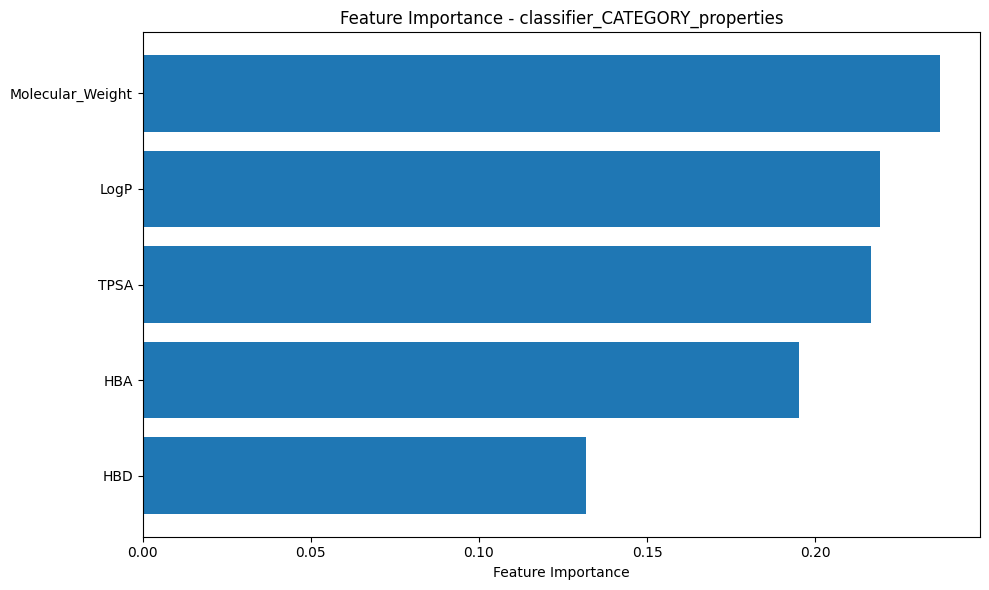


📊 Model: regressor_LogP_descriptors
   R² Score: 1.000


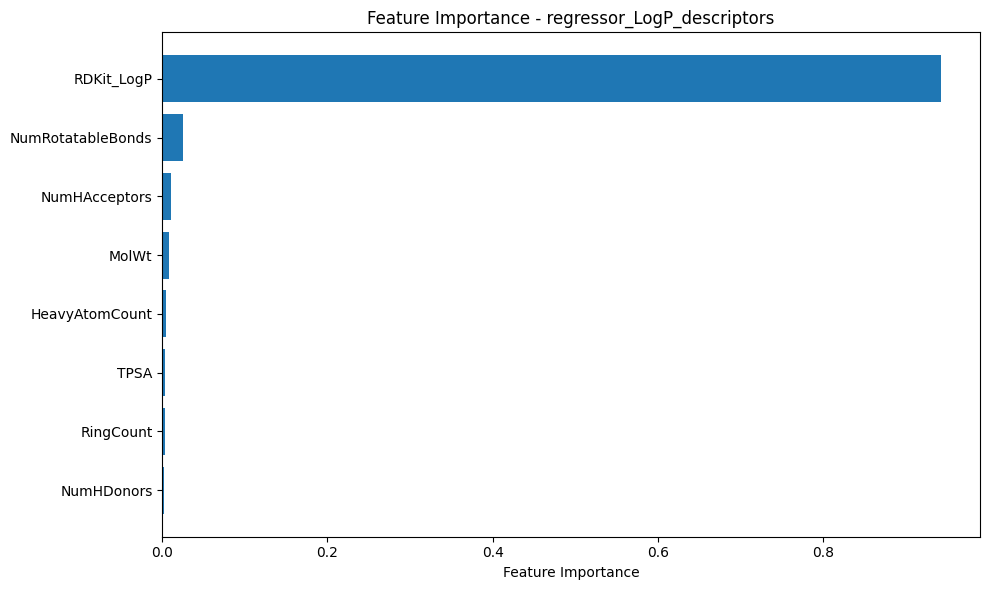


🔬 ADVANCED RESEARCH & ML INTERFACE

Research Options:
1. Run Comprehensive Analysis
2. Train Lipid Classifier
3. Train Property Predictor
4. Predict Lipid Class (SMILES)
5. Show Research Findings
6. Visualize Chemical Space
7. Export Analysis Results
8. Back to Main Menu



Choose option (1-8):  8


In [6]:
### import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize advanced pipeline
advanced_pipeline = AdvancedLipidPipeline("LMSD.sdf/structures.sdf")

# Run complete analysis (research + ML)
advanced_pipeline.run_advanced_analysis(sample_size=1000)

# Ask specific research questions:
# 1. What's the property distribution of glycerophospholipids vs sphingolipids?
# 2. Can we predict novel lipids based on chemical similarity?
# 3. What are the key descriptors that differentiate lipid classes?
# 4. How accurate is our ML model for lipid classification?

# Use the interactive interface
advanced_research_interface(advanced_pipeline)

# 📊 Example Research Outputs:

The system will now provide:

Chemical space maps (PCA plots of lipid diversity)

Classification models with accuracy metrics

Property prediction models for novel lipids

Feature importance analysis showing key molecular descriptors

Biosynthetic family distributions

Statistical reports on lipid characteristics

This transforms your pipeline from a search tool into a research discovery platform that can generate hypotheses, identify patterns, and predict properties for novel lipids! 🧪

Would you like me to implement any specific research analysis or extend the ML capabilities further?

